## Compuertas aplicadas en multiples cubits

En este Notebook vamos a explorar las compuertas que se aplican a multiples cubits. Para mantener los ejemplos uniformes y sencillos, vamos a definir una funcion como la que definimos anteriormente que nos permita correr nuestro circuito en el backend de nuestra eleccion, genere un diagrama del circuito y su representacion en la esfera de Bloch.

La diferencia con la funcion que definimos anteriormente es el simulador que vamos a usar, en este caso el simulador *'qasm'*.

In [1]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import numpy as np

pi = np.pi

In [3]:
def ejecutar_circuito(quantum_circuit):
    # Seleccionamos el simulador
    simulator = Aer.get_backend('qasm_simulator')
    # Ejecutar el circuito en el simulador
    result = execute(quantum_circuit, simulator, shots=1024).result()
    results = result.get_counts(quantum_circuit)
    # Diagrama del circuito
    circuit_diagram = quantum_circuit.draw()
    # Histograma de los resultados
    histogram = plot_histogram(results)
    return results, circuit_diagram, histogram

In [2]:
def ejecutar_circuito_sv(quantum_circuit):
    statevector_simulator = Aer.get_backend('statevector_simulator')
    result = execute(quantum_circuit, statevector_simulator).result()
    statevector_results = result.get_statevector(quantum_circuit)
    circuit_diagram = quantum_circuit.draw()
    q_sphere = plot_state_qsphere(statevector_results)
    return statevector_results, circuit_diagram, q_sphere

### Compuerta CNOT

In [4]:
# Empezamos por crear un circuito de 2 cubits
qc = QuantumCircuit(2)

In [5]:
# Añadimos una compuerta de Hadamard al cubit 1 o de tipo control
qc.h(0)

In [6]:
# Añdimos una compuerta de tipo CNOT, donde control = cubit 0, target = cubit 1
qc.cx(0,1)

In [7]:
# Aplicamos una operacion de medicion a todos los cubits y enviamos los resultados a bits clasicos en un mapeo 1-1
qc.measure_all()

In [8]:
# Ejecutamos el circuito y capturamos los resultados en las siguientes variables
result, img, histogram = ejecutar_circuito(qc)

In [9]:
result

{'00': 520, '11': 504}

In [10]:
img

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

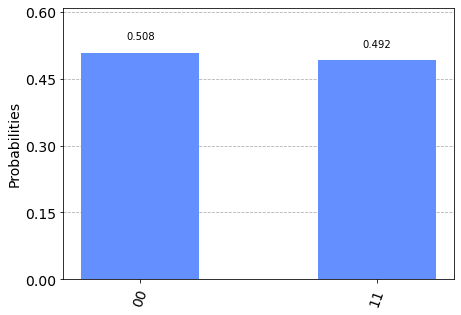

In [11]:
histogram

### Compuerta de Toffoli

In [12]:
# Creamos un circuito de 3 cubits
qc2 = QuantumCircuit(3)

In [13]:
# Añadimos la compuerta de Toffoli CCX
qc2.ccx(0,1,2)

In [14]:
qc2.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [15]:
qc2_decomposed = qc2.decompose()

In [16]:
qc2_decomposed.draw()

┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ TDG ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

### Compuerta Swap

In [17]:
# Empezamos con un circuito en el que el primer cubit se encuentra en el estado |0> y el segundo en el estado |1>

qc3 = QuantumCircuit(2)

In [18]:
qc3.x(1)

In [19]:
qc3.swap(0,1)

In [20]:
result3, img3, qsphere3 = ejecutar_circuito_sv(qc3)

In [26]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3, simulator, shots=1024).result()
#results = result.get_counts(qc3)
    # Diagrama del circuito
#    circuit_diagram = quantum_circuit.draw()
    # Histograma de los resultados
#    histogram = plot_histogram(results)

In [27]:
result

Result(backend_name='qasm_simulator', backend_version='0.8.2', qobj_id='8adc66c0-8185-4d2b-a8a6-2db2dae1bfdb', job_id='0ed8a557-f112-4f4f-b2fa-3fc42dffbdb2', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=2, name='circuit-90', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=774823464, metadata={'parallel_state_update': 16, 'parallel_shots': 1, 'measure_sampling': True, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.00017903500000000002)], date=2021-07-26T21:58:07.704357, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.8.2'), metadata={'mpi_rank': 0, 'time_taken': 0.00043051200000000003, 'max_gpu_memory_mb': 0, 'max_memory_mb': 32768, 'parallel_experiments': 1, 'num_mpi_processes': 1, 'omp_enabl

In [21]:
img3

q_0: ──────X─
     ┌───┐ │ 
q_1: ┤ X ├─X─
     └───┘

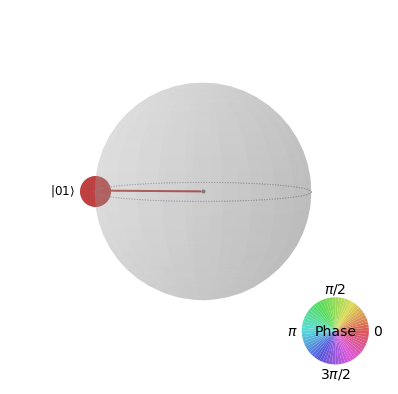

In [23]:
qsphere3

In [22]:
result3

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])